# Deep Learning to undestand Words

In [6]:
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import np_utils
from keras.datasets import mnist
from sklearn.metrics import confusion_matrix

import numpy as np

Text(0.5, 1.0, '0')

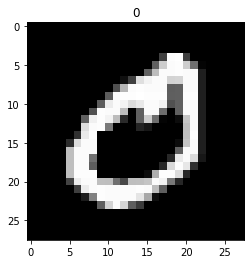

In [7]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

plt.imshow(X_train[21], cmap='gray')
plt.title(y_train[21])

In [8]:
# Reshape para vetor
X_train = X_train.reshape((len(X_train), np.prod(X_train.shape[1:])))
X_test = X_test.reshape((len(X_test), np.prod(X_test.shape[1:])))
X_test[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [9]:
# Normalização dos dados transformando-os em Float
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [10]:
# Normalização (255 é o valor máximo)
X_train = X_train / 255
X_test = X_test / 255

In [11]:
# Transformação para o formato dummy (temos 10 classes)
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [17]:
# Estrutura da rede neural: 784 - 64 - 64 - 64 - 10
# Dropout é utilizado para zerar uma porcentagem dos neurônios, para evitar o overfitting
modelo = Sequential()
modelo.add(Dense(units = 64, activation = 'relu', input_dim = 784))
modelo.add(Dropout(0.2))
modelo.add(Dense(units = 64, activation = 'relu'))
modelo.add(Dropout(0.2))
modelo.add(Dense(units = 64, activation = 'relu'))
modelo.add(Dropout(0.2))
#camada de saida, softmax probabilidade
modelo.add(Dense(units = 10, activation = 'softmax'))

In [18]:
modelo.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 64)                50240     
_________________________________________________________________
dropout_9 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_13 (Dense)             (None, 64)                4160      
_________________________________________________________________
dropout_10 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_14 (Dense)             (None, 64)                4160      
_________________________________________________________________
dropout_11 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_15 (Dense)             (None, 10)               

In [19]:
# Configuração dos parâmetros da rede neural e treinamento (utilizando base de dados de validação)
# Na variável historico temos os histórico das execuções (erro e accuracy)
modelo.compile(optimizer = 'adam', loss = 'categorical_crossentropy',
               metrics = ['accuracy'])
historico = modelo.fit(X_train, y_train, epochs = 20,
                       validation_data = (X_test, y_test))

Epoch 1/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.7385 - accuracy: 0.7616 - val_loss: 0.1640 - val_accuracy: 0.9504
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2384 - accuracy: 0.9295 - val_loss: 0.1332 - val_accuracy: 0.9588
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1959 - accuracy: 0.9431 - val_loss: 0.1279 - val_accuracy: 0.9637
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1716 - accuracy: 0.9494 - val_loss: 0.1109 - val_accuracy: 0.9662
Epoch 5/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1576 - accuracy: 0.9532 - val_loss: 0.1085 - val_accuracy: 0.9681
Epoch 6/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1334 - accuracy: 0.9614 - val_loss: 0.1120 - val_accuracy: 0.9682
Epoch 7/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1352 - accuracy: 0.9611 - val_loss: 0.1011 - val_accuracy:

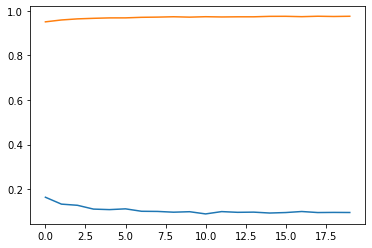

In [20]:
# Gráfico para visualizar os erros e accuracy
historico.history.keys()
#evolução do erro, azul
plt.plot(historico.history['val_loss'])
#performance da rede
plt.plot(historico.history['val_accuracy'])

In [22]:
prev = modelo.predict(X_test)
prev

array([[3.1005801e-12, 3.0324972e-07, 1.7531895e-07, ..., 9.9999595e-01,
        3.2997275e-11, 3.4972554e-06],
       [5.7652559e-13, 5.2712157e-06, 9.9988770e-01, ..., 5.9896173e-08,
        6.0047367e-09, 1.3535359e-13],
       [3.2921827e-12, 9.9999428e-01, 1.2205510e-08, ..., 1.2014111e-07,
        5.0666436e-06, 7.7850759e-10],
       ...,
       [4.4310958e-11, 1.9715481e-11, 3.4283234e-09, ..., 1.3207863e-09,
        9.4871694e-11, 7.1953565e-07],
       [1.2278880e-15, 2.0475731e-16, 1.0812454e-15, ..., 2.3735560e-19,
        4.2676800e-12, 4.0206584e-14],
       [1.3180228e-11, 2.0187449e-16, 1.8814514e-12, ..., 5.0661966e-20,
        4.2259325e-12, 2.5264002e-16]], dtype=float32)

In [25]:
# valor máximo (com a probabilidade maior por serem 10 saídas) e geração da matriz de confusão
y_teste_matriz = [np.argmax(t) for t in y_test]
y_previsoes_matriz = [np.argmax(t) for t in prev]
confusao = confusion_matrix(y_teste_matriz, y_previsoes_matriz)
confusao

array([[ 964,    1,    2,    2,    0,    0,    5,    2,    3,    1],
       [   0, 1126,    2,    1,    0,    1,    2,    1,    2,    0],
       [   4,    3, 1007,    4,    1,    1,    1,    9,    2,    0],
       [   1,    0,    6,  987,    0,    3,    0,    5,    2,    6],
       [   0,    0,    2,    1,  964,    0,    5,    1,    0,    9],
       [   2,    1,    0,   13,    2,  858,    7,    2,    4,    3],
       [   5,    3,    1,    1,    7,    6,  933,    0,    2,    0],
       [   0,    6,    7,    4,    1,    0,    0, 1007,    1,    2],
       [   3,    1,    4,    6,    5,    3,    0,    8,  943,    1],
       [   1,    2,    0,    6,   26,    2,    0,    4,    3,  965]])

In [26]:
y_train[20]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

In [28]:
novo = X_train[20]
# Matriz -> Vetor
novo = np.expand_dims(novo, axis=0)

pred = modelo.predict(novo)
pred = [np.argmax(pred) for t in pred]
pred

[4]